# <span style="color:darkblue"> I. Setup working environment  </span>

<font size = "5">

Import libraries

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

<font size = "5">
Import data and parse columns

In [10]:
portfolios         = pd.read_csv("portfolios.csv")
portfolios["date"] = pd.to_datetime(portfolios["date_str"])

# <span style="color:darkblue"> II. Subplots  </span>

<font size = "5">

Subplot size


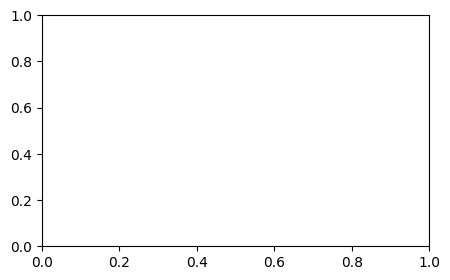

In [11]:

# Create an empty layout with 1 row x 1 column
# "figsize" takes a  list with the width and height

fig, ax = plt.subplots(1,1,figsize = [5,3])

<font size = "5">

Subplots + Lines

Text(0.5, 1.0, 'Portfolio performance over time')

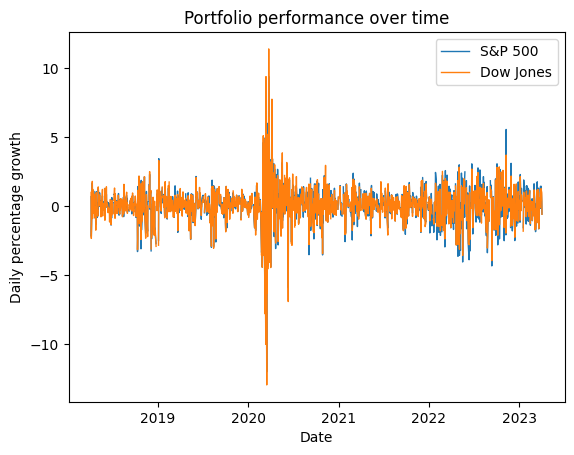

In [12]:
plot_data = portfolios[["date","growth_sp500","growth_djia"]].set_index("date")


fig, ax = plt.subplots(1,1)
ax.plot(plot_data,
        linewidth=1)
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")
ax.set_title("Portfolio performance over time")


<font size = "5">

Subplots + Histograms

Text(0.5, 1.0, 'Histogram of portfolio growth')

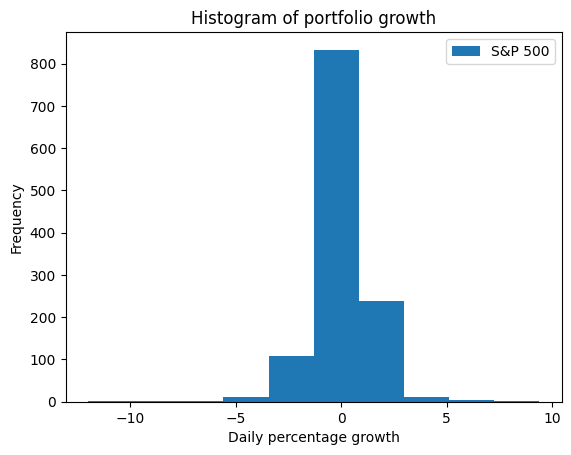

In [13]:
fig, ax = plt.subplots(1,1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth")
ax.set_title("Histogram of portfolio growth")


<font size = "5">

Growth of Dow Jones vs S&P500

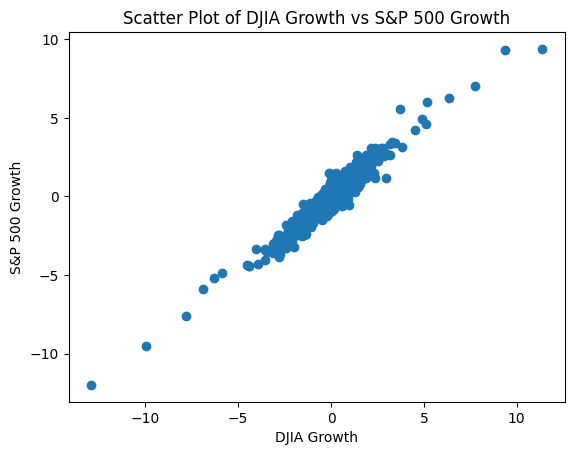

In [14]:
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x=portfolios['growth_djia'], y=portfolios['growth_sp500'])

# Set the labels and title
ax.set_xlabel('DJIA Growth')
ax.set_ylabel('S&P 500 Growth')
ax.set_title('Scatter Plot of DJIA Growth vs S&P 500 Growth')

# Display the plot
plt.show()



# <span style="color:darkblue"> III. Colors, size, and padding  </span>

<font size = "5">

Formatting axis labels


Text(0.5, 0, 'Date')

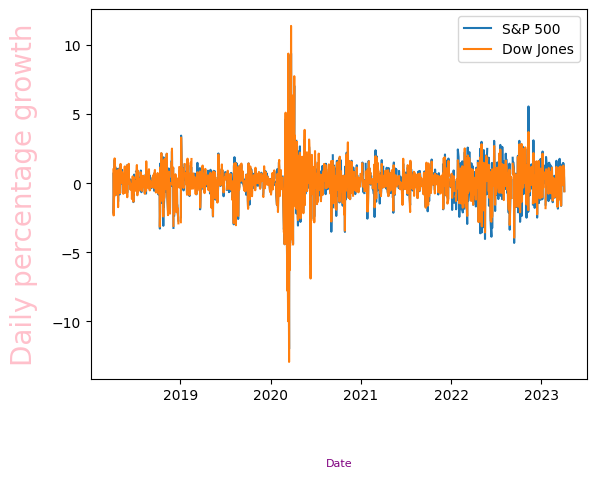

In [15]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])

# labelpad is the space between the labels and the numbers
ax.set_ylabel("Daily percentage growth",
              fontsize = 20,
              color = "pink",
              labelpad = 10)
ax.set_xlabel("Date",
              fontsize = 8,
              color = "purple",
              labelpad = 40)


<font size = "5">

Formatting ticks


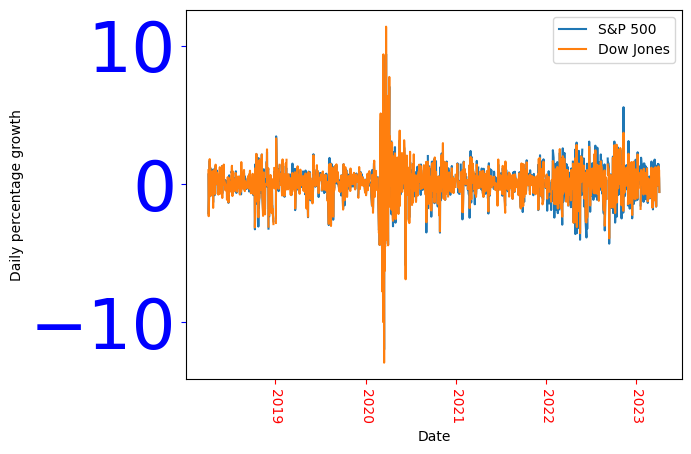

In [16]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Change format of ticks
# Rotation is an angle from -90 to 90 degrees
ax.xaxis.set_tick_params(labelsize = 10,
                         rotation=-90,
                         colors = "red")
ax.yaxis.set_tick_params(labelsize = 50,
                         rotation=0,
                         colors = "blue")


<font size = "5">

Rotating labels and increasing padding

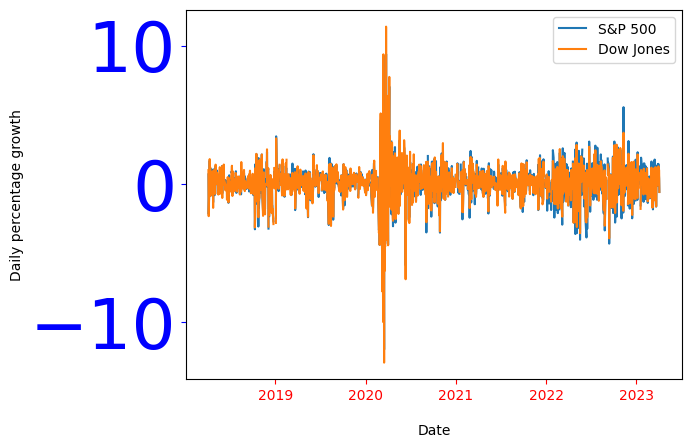

In [17]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date", labelpad=15)  # Increase the padding with labelpad parameter

# Change format of ticks
# Rotation is an angle from -90 to 90 degrees
ax.xaxis.set_tick_params(labelsize=10, rotation=0, colors="red")  # Rotate the labels by 45 degrees

# Set the y-axis tick parameters
ax.yaxis.set_tick_params(labelsize=50, rotation=0, colors="blue")

plt.show()




# <span style="color:darkblue"> IV. Tick Spacing  </span>

<font size = "5">

Formatting date axes

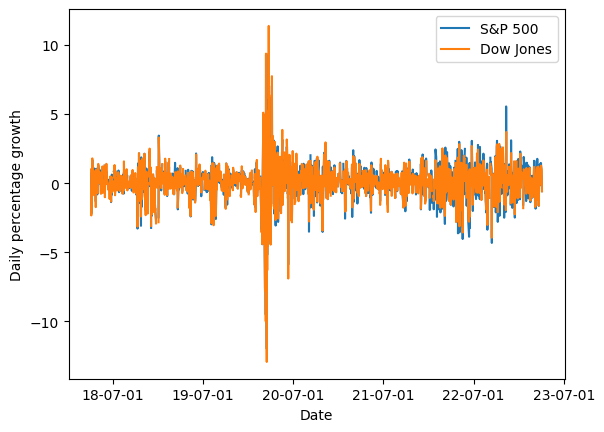

In [18]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Establish the frequency of labels and their format
# Can also use "DayLocator","MonthLocator", "YearLocator", 
# Use wildcards to set the year format: See lecture on time data

config_ticks   = mdates.MonthLocator(interval=12)
format_ticks = mdates.DateFormatter('%y-%m-%d') 

ax.xaxis.set_major_locator(config_ticks)
ax.xaxis.set_major_formatter(format_ticks)


<font size = "5">

Formatting numeric axes

(-20.0, 20.0)

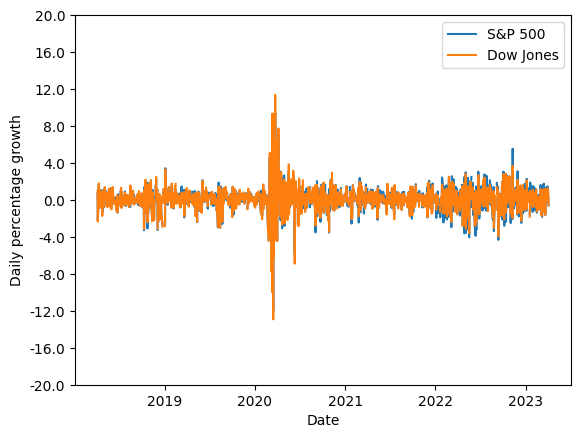

In [19]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")


# Set number of ticks, configure them, and display them
M = 10
config_ticks = ticker.MaxNLocator(M)
format_ticks = ticker.FormatStrFormatter('%.1f')
ax.yaxis.set_major_locator(config_ticks)
ax.yaxis.set_major_formatter(format_ticks)

# Set graph limits manually
ax.set_ylim(-20,20)


# <span style="color:darkblue"> V. Subsetting with Time Data  </span>

<font size = "5" >

Subsetting before/after

In [24]:
financial      = pd.read_csv("financial.csv")
financial["date"] = pd.to_datetime(financial["date_str"])
financial         = financial.sort_values("date",ascending = True)

subset_before  = financial.query('date >= "2019-01-01" ')
subset_after   = financial.query('date <= "2020-01-01" ')

financial["diff_sp500"] = financial["sp500"].diff()
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]

<font size = "5" >

Obtain a subset before/after

In [25]:
subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [26]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

<font size = "5">

Plot results

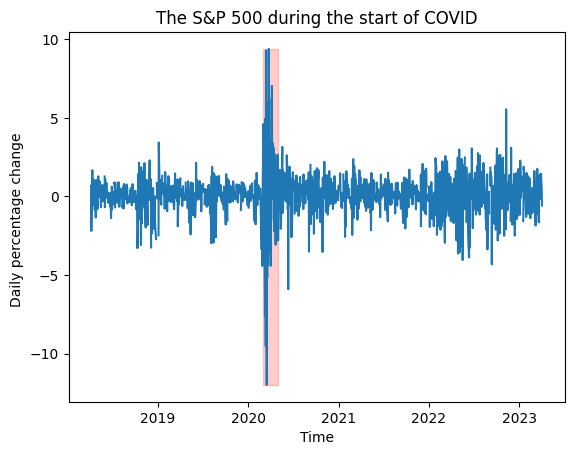

In [27]:
# Create a line plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()